In [1]:
import pandas as pd

data = pd.read_csv("admissions_data.csv")

In [2]:
mask = data["academic_year"].isin([2020,2021,2022,2023,2024,2025])
data_current_students = data[mask]
data_current_students.isna().sum()

academic_year                    0
legacy                           0
gender                           4
campus_visit_date_exists         0
gpa_points                       0
IMP_EST_HOUSEHOLD_INCOME_RANK    0
IMP_ZIP_MILES_FROM_CAMPUS        0
IMP_LEADSOURCE_CODE              0
IMP_MINORITY                     0
IMP_SCHOOL_TYPE                  0
IMP_ZIP_MEDIAN_INCOME_2          0
ACCEPTED                         0
ACTIVE_PAID                      0
dtype: int64

In [3]:
#dropping nulls from gender from campus (only 4)
data_current_students_final=data_current_students.dropna(inplace=False, axis=0)

#filtering for accepted students only
data_current_students_final = data_current_students_final[data_current_students_final["ACCEPTED"]==1]
data_current_students_final.shape

(9707, 13)

In [4]:
data_current_students_final.isna().sum()

academic_year                    0
legacy                           0
gender                           0
campus_visit_date_exists         0
gpa_points                       0
IMP_EST_HOUSEHOLD_INCOME_RANK    0
IMP_ZIP_MILES_FROM_CAMPUS        0
IMP_LEADSOURCE_CODE              0
IMP_MINORITY                     0
IMP_SCHOOL_TYPE                  0
IMP_ZIP_MEDIAN_INCOME_2          0
ACCEPTED                         0
ACTIVE_PAID                      0
dtype: int64

In [5]:
data_current_students_final.rename(columns = {"IMP_EST_HOUSEHOLD_INCOME_RANK":"est_household_income_rank"},inplace=True)
data_current_students_final.rename(columns = {"IMP_LEADSOURCE_CODE":"leadsource_code"},inplace=True)
data_current_students_final.rename(columns = {"IMP_MINORITY":"minority"},inplace=True)

/tmp/ipykernel_2639771/2454340956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_current_students_final, x="ACTIVE_PAID", palette=["#522D72"])
/tmp/ipykernel_2639771/2454340956.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = data_current_students_final, x="ACTIVE_PAID", palette=["#522D72"])


<AxesSubplot:xlabel='ACTIVE_PAID', ylabel='count'>

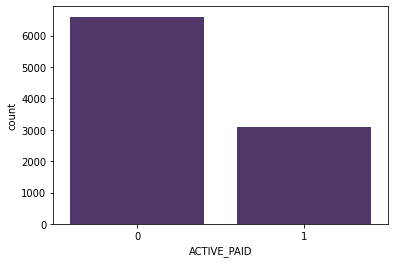

In [6]:
import seaborn as sns

sns.countplot(data = data_current_students_final, x="ACTIVE_PAID", palette=["#522D72"])

In [7]:
#Normalizing Data
data_current_students_final["miles_norm"] = (data_current_students_final["IMP_ZIP_MILES_FROM_CAMPUS"]-data_current_students_final["IMP_ZIP_MILES_FROM_CAMPUS"].min()) / (data_current_students_final["IMP_ZIP_MILES_FROM_CAMPUS"].max()-data_current_students_final["IMP_ZIP_MILES_FROM_CAMPUS"].min())

data_current_students_final["gpa_norm"] = (data_current_students_final["gpa_points"]-data_current_students_final["gpa_points"].min()) / (data_current_students_final["gpa_points"].max()-data_current_students_final["gpa_points"].min())

data_current_students_final["income_rank_norm"] = (data_current_students_final["est_household_income_rank"]-data_current_students_final["est_household_income_rank"].min()) / (data_current_students_final["est_household_income_rank"].max()-data_current_students_final["est_household_income_rank"].min())

data_current_students_final["zip_rank_norm"] = (data_current_students_final["IMP_ZIP_MEDIAN_INCOME_2"]-data_current_students_final["IMP_ZIP_MEDIAN_INCOME_2"].min()) / (data_current_students_final["IMP_ZIP_MEDIAN_INCOME_2"].max()-data_current_students_final["IMP_ZIP_MEDIAN_INCOME_2"].min())


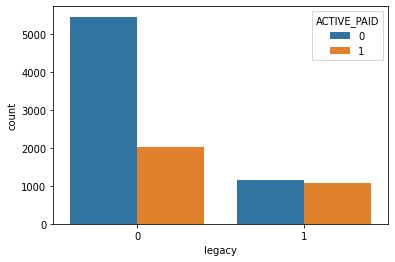

<AxesSubplot:xlabel='legacy'>

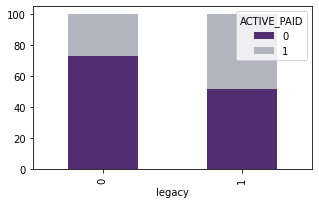

In [8]:
import matplotlib.pyplot as plt
sns.countplot(data=data_current_students_final, x='legacy', hue='ACTIVE_PAID')
plt.show()

df_legacy = data_current_students_final.groupby('legacy')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_legacy.plot(kind='bar', stacked=True, figsize=(5, 3), color = ["#522D72","#B2B4BE"])

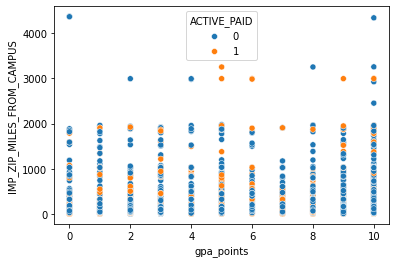

In [9]:
sns.scatterplot(data=data_current_students_final, x='gpa_points', y='IMP_ZIP_MILES_FROM_CAMPUS', hue='ACTIVE_PAID')
plt.show()

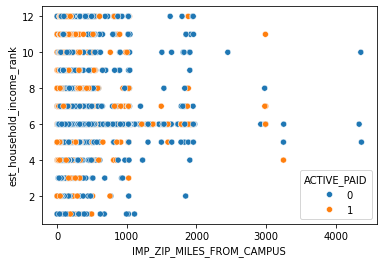

In [10]:
sns.scatterplot(data=data_current_students_final, y='est_household_income_rank', x='IMP_ZIP_MILES_FROM_CAMPUS', hue='ACTIVE_PAID')
plt.show()

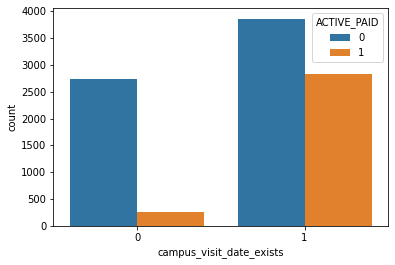

<AxesSubplot:xlabel='campus_visit_date_exists'>

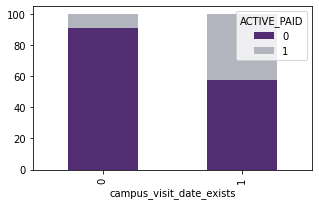

In [11]:
import matplotlib.pyplot as plt
sns.countplot(data=data_current_students_final, x='campus_visit_date_exists', hue='ACTIVE_PAID')
plt.show()

df_cv = data_current_students_final.groupby('campus_visit_date_exists')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_cv.plot(kind='bar', stacked=True, figsize=(5, 3), color = ["#522D72","#B2B4BE"])

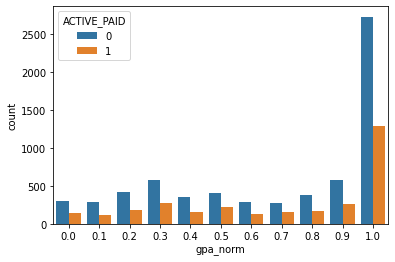

<AxesSubplot:xlabel='gpa_norm'>

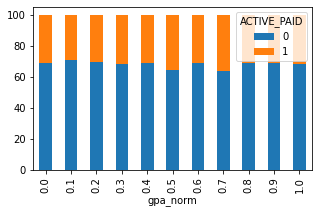

In [12]:
import matplotlib.pyplot as plt
sns.countplot(data=data_current_students_final, x='gpa_norm', hue='ACTIVE_PAID')
plt.show()

df_gpa = data_current_students_final.groupby('gpa_norm')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_gpa.plot(kind='bar', stacked=True, figsize=(5, 3))

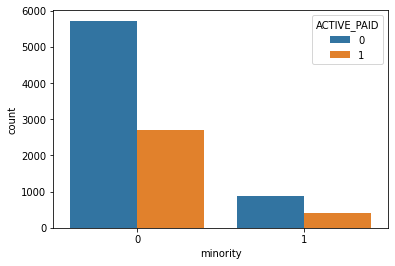

<AxesSubplot:xlabel='minority'>

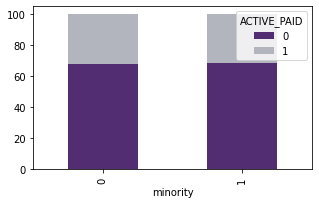

In [13]:
sns.countplot(data=data_current_students_final, x='minority', hue='ACTIVE_PAID')
plt.show()

df_minority = data_current_students_final.groupby('minority')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_minority.plot(kind='bar', stacked=True, figsize=(5, 3), color = ["#522D72","#B2B4BE"])

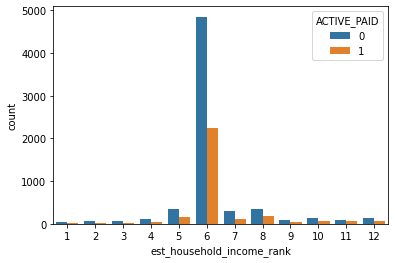

<AxesSubplot:xlabel='est_household_income_rank'>

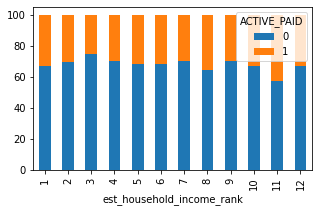

In [14]:
sns.countplot(data=data_current_students_final, x='est_household_income_rank', hue='ACTIVE_PAID')
plt.show()

df_hir = data_current_students_final.groupby('est_household_income_rank')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_hir.plot(kind='bar', stacked=True, figsize=(5, 3))

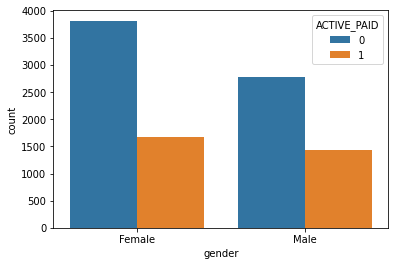

<AxesSubplot:xlabel='gender'>

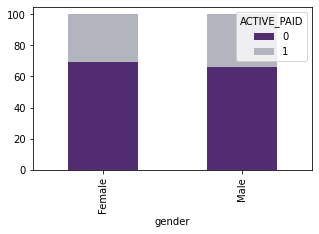

In [15]:
sns.countplot(data=data_current_students_final, x='gender', hue='ACTIVE_PAID')
plt.show()

df_hir = data_current_students_final.groupby('gender')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_hir.plot(kind='bar', stacked=True, figsize=(5, 3), color = ["#522D72","#B2B4BE"])

In [16]:
df = data_current_students_final.groupby(["leadsource_code"]).size().reset_index()
df

,leadsource_code,0
0,---,38
1,IAP,22
2,IAX,67
3,ICA,99
4,ICM,432
5,ICP,1178
6,ICV,1847
7,IEM,4
8,IFA,151
9,IMP,1


In [17]:
remove_list = ["IAP","IEM","IMP","INC","INF","INV","IOE","IRS","IYC"]
dff = data_current_students_final[~data_current_students_final["leadsource_code"].isin(remove_list)]


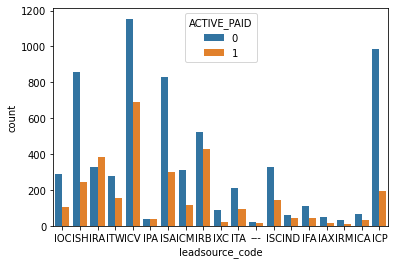

<AxesSubplot:xlabel='leadsource_code'>

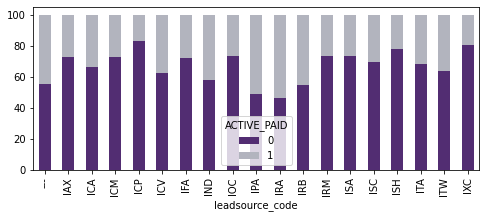

In [18]:
sns.countplot(data=dff, x='leadsource_code', hue='ACTIVE_PAID')
plt.show()

df_hir = dff.groupby('leadsource_code')['ACTIVE_PAID'].value_counts(normalize=True).unstack() * 100
df_hir.plot(kind='bar', stacked=True, figsize=(8, 3), color = ["#522D72","#B2B4BE"])

In [19]:
data_current_students_final.to_csv('cleaned_admissions_data.csv', index=False)

In [20]:
data_current_students_final = pd.get_dummies(data_current_students_final, columns=["leadsource_code"])
#data_current_students_final = pd.get_dummies(data_current_students_final, columns=["IMP_SCHOOL_TYPE"])
#data_current_students_final = pd.get_dummies(data_current_students_final, columns=["gender"])

data_current_students_final.head()

,academic_year,legacy,gender,campus_visit_date_exists,gpa_points,est_household_income_rank,IMP_ZIP_MILES_FROM_CAMPUS,minority,IMP_SCHOOL_TYPE,IMP_ZIP_MEDIAN_INCOME_2,...,leadsource_code_IRB,leadsource_code_IRM,leadsource_code_IRS,leadsource_code_ISA,leadsource_code_ISC,leadsource_code_ISH,leadsource_code_ITA,leadsource_code_ITW,leadsource_code_IXC,leadsource_code_IYC
2,2020,0,Female,1,10,10,173,0,Public,89822,...,0,0,0,0,0,0,0,0,0,0
3,2020,1,Female,1,10,5,198,0,Public,56306,...,0,0,0,0,0,1,0,0,0,0
4,2020,1,Female,1,1,6,43,0,IndependentNotReligious,40467,...,0,0,0,0,0,0,0,0,0,0
5,2020,1,Female,1,2,12,174,0,IndependentNotReligious,91954,...,0,0,0,0,0,0,0,1,0,0
6,2020,0,Male,1,5,6,49,0,IndependentNotReligious,90024,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from imblearn.metrics import specificity_score

import random
random.seed(123)
rando = random.randint(0,100)

In [22]:
# Prepare data for scikit-learn
X = data_current_students_final.drop(columns=["gpa_norm","miles_norm","IMP_ZIP_MILES_FROM_CAMPUS","zip_rank_norm","gpa_norm","income_rank_norm","minority","ACCEPTED","ACTIVE_PAID","academic_year", "gpa_points", "IMP_ZIP_MEDIAN_INCOME_2","IMP_SCHOOL_TYPE","gender"])
y = data_current_students_final["ACTIVE_PAID"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rando, stratify = y)

# Split train into training and validation
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=.25, random_state=rando, stratify = y_train)
print(X.head())

   legacy  campus_visit_date_exists  est_household_income_rank  \
2       0                         1                         10   
3       1                         1                          5   
4       1                         1                          6   
5       1                         1                         12   
6       0                         1                          6   

   leadsource_code_---  leadsource_code_IAP  leadsource_code_IAX  \
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   
5                    0                    0                    0   
6                    0                    0                    0   

   leadsource_code_ICA  leadsource_code_ICM  leadsource_code_ICP  \
2                    0                    0                    0   
3                    0                    0               

In [23]:
# Initialize and train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred_v = model.predict(X_validate)

nb_predict_a = model.predict_proba(X_validate)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_validate, y_pred_v)
precision = precision_score(y_validate, y_pred_v, pos_label=1)
recall = recall_score(y_validate, y_pred_v, pos_label=1)
f1_nb = f1_score(y_validate, y_pred_v)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_nb}')

Accuracy: 0.703913491246138
Precision: 0.5547619047619048
Recall: 0.3752012882447665
F1 Score: 0.44764649375600385


0.858440575321726


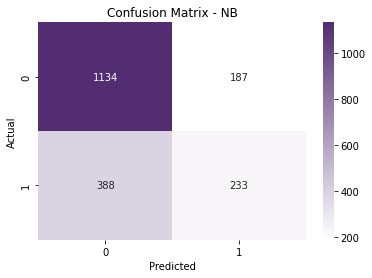

In [24]:
from sklearn.metrics import confusion_matrix
var = sns.color_palette("blend:#FFFFFF,#522D72",as_cmap=True)
cm_nb=confusion_matrix(y_validate, y_pred_v)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap=var, cbar=True)
plt.title('Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

tn, fp, fn, tp = cm_nb.ravel()
specificity = tn / (tn + fp)
print(specificity)

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import set_config

knn_spec = KNeighborsClassifier(n_neighbors=10)

knn_fit = knn_spec.fit(X_train, y_train)
print(knn_fit.classes_)

knn_y_predict_v = knn_fit.predict(X_validate)

knn_predict_a = knn_spec.predict_proba(X_validate)[:, 1]

[0 1]


In [26]:
# Evaluate the model
accuracy = accuracy_score(y_validate, knn_y_predict_v)
precision = precision_score(y_validate, knn_y_predict_v, pos_label=1)
recall = recall_score(y_validate, knn_y_predict_v, pos_label=1)
f1_knn = f1_score(y_validate, knn_y_predict_v)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_knn}')

Accuracy: 0.6323377960865088
Precision: 0.42237061769616024
Recall: 0.4074074074074074
F1 Score: 0.41475409836065574


0.7380772142316427


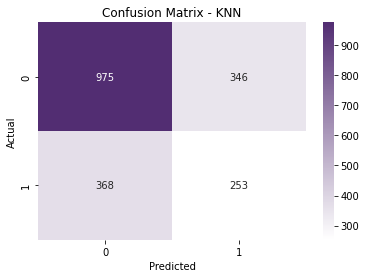

In [27]:
var = sns.color_palette("blend:#FFFFFF,#522D72",as_cmap=True)
cm_knn=confusion_matrix(y_validate, knn_y_predict_v)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=var, cbar=True)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tn, fp, fn, tp = cm_knn.ravel()
specificity = tn / (tn + fp)
print(specificity)

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the model
dt_clf.fit(X_train, y_train)

# Evaluate on test set
tree_y_predict_v = dt_clf.predict(X_validate)

tree_predict_a = dt_clf.predict_proba(X_validate)[:, 1]

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_validate, tree_y_predict_v)
precision = precision_score(y_validate, tree_y_predict_v, pos_label=1)
recall = recall_score(y_validate, tree_y_predict_v, pos_label=1)
f1_tree = f1_score(y_validate, tree_y_predict_v)



print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_tree}')

Accuracy: 0.713697219361483
Precision: 0.6038338658146964
Recall: 0.30434782608695654
F1 Score: 0.40471092077087795


0.9061317183951552


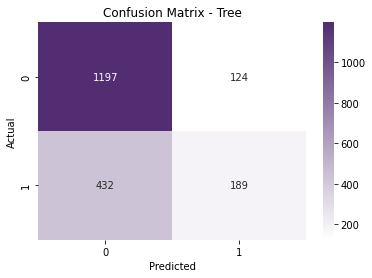

In [30]:
var = sns.color_palette("blend:#FFFFFF,#522D72",as_cmap=True)
cm_tree=confusion_matrix(y_validate, tree_y_predict_v)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap = var, cbar=True)
plt.title('Confusion Matrix - Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual') 
tn, fp, fn, tp = cm_tree.ravel()
specificity = tn / (tn + fp)
print(specificity)

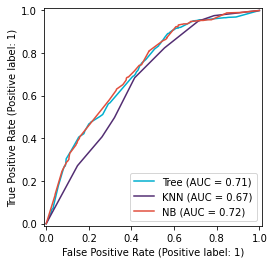

In [31]:
#ROC curve stuff
from sklearn.metrics import RocCurveDisplay 
roc_curve1 = RocCurveDisplay.from_predictions(y_validate, tree_predict_a, name="Tree", color="#00AFCE")
roc_curve2 = RocCurveDisplay.from_predictions(y_validate, knn_predict_a, ax=roc_curve1.ax_, name="KNN", color="#522D72")
roc_curve3 = RocCurveDisplay.from_predictions(y_validate, nb_predict_a, ax=roc_curve1.ax_, name="NB", color="#E14F3D")

plt.show()

In [32]:
# Initialize and train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred_v = model.predict(X_test)

nb_predict_a = model.predict_proba(X_validate)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_v)
precision = precision_score(y_test, y_pred_v, pos_label=1)
recall = recall_score(y_test, y_pred_v, pos_label=1)
f1_nb = f1_score(y_test, y_pred_v)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_nb}')

Accuracy: 0.7049433573635427
Precision: 0.5631578947368421
Recall: 0.3446054750402576
F1 Score: 0.4275724275724276


0.874337623012869


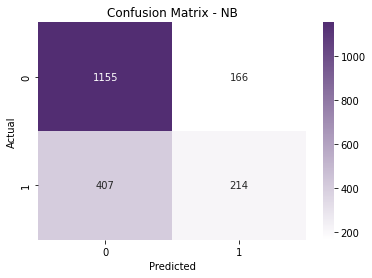

In [33]:
from sklearn.metrics import confusion_matrix
var = sns.color_palette("blend:#FFFFFF,#522D72",as_cmap=True)
cm_nb=confusion_matrix(y_test, y_pred_v)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap=var, cbar=True)
plt.title('Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

tn, fp, fn, tp = cm_nb.ravel()
specificity = tn / (tn + fp)
print(specificity)